In [21]:
import glob
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
images = glob.glob("*/*.jpg")
images = list(map(io.imread, images))

In [39]:
#Extrai patches da imagem
def get_patches(image, psize, stride, white_tolerance):
    candidate_patches = []
    if image.shape[0] < psize or image.shape[1] < psize:
        return candidate_patches
    
    xpatches = np.arange(psize, image.shape[0] + 1, stride)
    ypatches = np.arange(psize, image.shape[1] + 1, stride)
    
    for i in range(len(xpatches)):
        for j in range(len(ypatches)):
            candidate_patches.append(image[i * stride:xpatches[i], j * stride:ypatches[j]])
            
    #elimina patches vazios
    candidate_patches = list(filter(lambda x: np.sum(x == 255) < white_tolerance * psize * psize, candidate_patches))
    
    return candidate_patches
    

In [112]:
from functools import reduce

psize = 40
stride = 10
white_tolerance = 0.80 


patches = list(map(lambda x: get_patches(x, psize, stride, white_tolerance), images))
patches = reduce(lambda x, y : x + y, patches)
print(len(patches))

311694


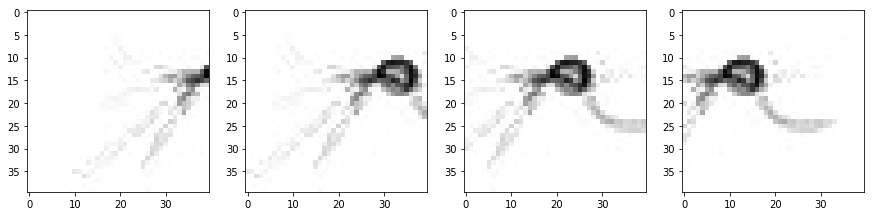

In [131]:
fig = plt.figure(figsize=(15, 15))
start = 131
for i in range(0, 4):
    fig.add_subplot(1, 4, i + 1)
    plt.imshow(patches[start + i], cmap='gray')

In [117]:
from skimage.transform import rescale as rescale
from scipy.misc import imresize as imresize

def get_lowres(image):
    smol = rescale(image, 0.5, anti_aliasing=True, multichannel=False, mode='reflect')
    lowres = imresize(smol, (40, 40), interp="bicubic")
    return image, lowres
    

/home/abello/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


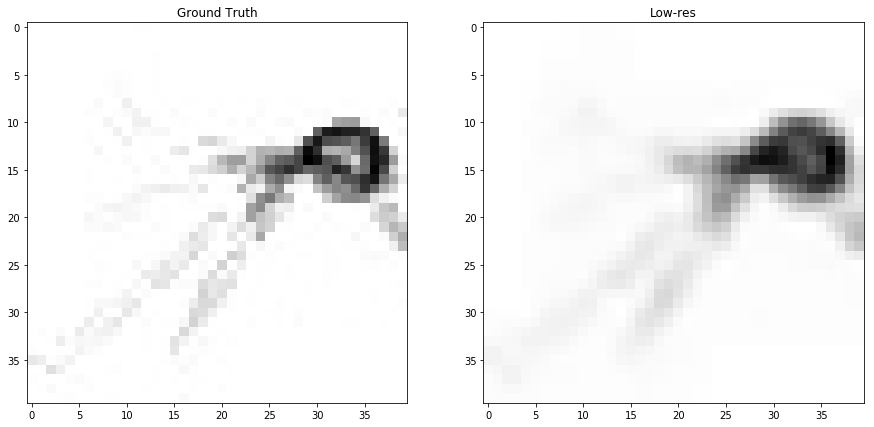

In [132]:
fig = plt.figure(figsize=(15, 15))
patch, lowres = get_lowres(patches[132])
fig.add_subplot(1, 2, 1)
plt.title("Ground Truth")
plt.imshow(patch, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.title("Low-res")
plt.imshow(lowres, cmap='gray')

In [135]:
dataset = np.array(map(get_lowres, patches))
np.save("dataset", dataset)